# Project 1: Movies, Domestic Gross, and Budjets

#### Proposal
I would like to use the above data on Movie Budgets and Box Office Earnings.  I discovered this data source on the list of data that you provided in the week 2 PowerPoint.  The data is presented as a table on the website, and I verified that I could scrape the data legally.  Further, the data is free for me to use, and has not been publically analyzed.  The data has 7 columns (Movie, Month, Day, Year, Budget, Domestic Gross, and Worldwide Gross), and 5,222 rows with string and float values.  Lastly, I have general knowledge about the contents in this data.  After referencing the rubric, I believe that it meets all the requirements so now I will explain why I would like to work with this data.

Using this data set, there is a couple of things I would like to explore.  First, I would like to see how the average budget and average gross change from year to year.  I would also like to see if the average profit (gross – budget) shows any patterns from year to year.  After looking at the broad spectrum of year to year, I would like to look at the average gross from month to month and see if that shows anything interesting, and if there is a pattern of successful months from year to year.  Further options of exploration could be finding the outliers each year (which movie made the most money each year), and compare the outliers of each year.

#### Data Retrieval
Data was picked off the list of given data sources that lead me to this website:
<https://www.statcrunch.com/app/index.php?dataid=2188684>
After trying to scrape the data I was unsuccessful, and recieved the data in a csv from course instructor.

In [1]:
#Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import CSV file
columns = ["Movie", "Month", "Day", "Year", "Budget($M)", "Domestic Gross($M)"]
df = pd.read_csv("Movies_Data.csv", usecols = columns)

#### Data Cleaning
To tidy the data I verified that the columns did not contain any variables, and the  values did not have multiple variables or lists.
To clean the data I check the minimum and maximum values of the float variables.  I noticed that there were 253 rows that had a domestic value of 0.  I assumed these films to be non Domestic films.  In this analysis I only want to look at domestic films so I removed these rows from my dataframe.
To clean the columns with strings, I check the Movie columns for *, /, :, and other weird characters.  However, these characters were okay becuase they were actually in the title (as verified with a quick imdb.com check).  Lastly I checked to make sure the month column only contained months

It is important to note that this set does not contain every movie made in each year.  If fact prior to the 1980 it only shows a few films per year.  So the outliers in the data for earlier years will stand out more than outliers closer to present.  It is also not clear in the data set whether these numbers take into account inflation.  So it is unknown whether the movie made that much money that year, or made that much money with inflation taken into account.

In [3]:
#Data has appropriate columns with no variables in the columns, and no value with multiple variables(list)
#I renamed the budget and domestic gross columns to have clearer names
#Here I drop columns with domestic gross equal to 0.  I am doing this because I only want to look at 
#Domestic films, and if domestic gross = 0, then it is not a domestic film.
# in this code I remove rows where the domestic gross is 0
df.rename(columns = {'Domestic Gross($M)':'Domestic Gross($Millions)', 'Budget($M)':'Budget($Millions)'}, inplace = True)
df = df[df["Domestic Gross($Millions)"] != 0]

#### Analysis of Data
In the following section I would like to look at:
1. Movie with the largest and smallest gross
2. The average budget and average gross each year
3. The profit (as calculated by gross - budget)

##### Average Budget Each Year and Average Domestic Gross Each Year

Text(0, 0.5, 'Domestic Gross($Millions)')

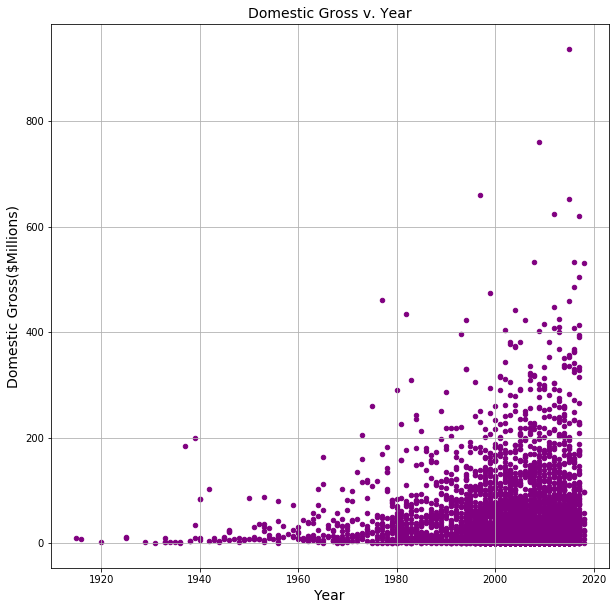

In [4]:
#I waned to start by making a scatter plot of all the films
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Domestic Gross v. Year", fontsize = 14)
df.plot.scatter(x = 'Year', y = 'Domestic Gross($Millions)',color = 'purple', ax=ax)
ax.grid(True)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Domestic Gross($Millions)', fontsize=14)

Looking at this graph I notice a few outliers.  I also notice that as the years increase the spread of domestic gross gets larger.  So it appears that there are more movies in the dataframe as the years get closer to present, and that most movies make under the spread becomes wider with and increasing amount of outliers.

In [5]:
#Finds the minimum and maximum domestic gross
df[df["Domestic Gross($Millions)"] == df["Domestic Gross($Millions)"].min()]
df[df["Domestic Gross($Millions)"] == df["Domestic Gross($Millions)"].max()]
df.nlargest(10, ['Domestic Gross($Millions)'])
#df[df["Year"] == 2017].count()   #Use this in presentation to answer any questions about certain sections of dataframe

,Movie,Month,Day,Year,Budget($Millions),Domestic Gross($Millions)
2,Star Wars Ep. VII: The Force Awakens,Dec,18,2015,306.0,936.662225
0,Avatar,Dec,18,2009,425.0,760.507625
1,Titanic,Dec,19,1997,200.0,659.363944
3,Jurassic World,Jun,12,2015,215.0,652.270625
4,The Avengers,May,4,2012,225.0,623.279547
8,Star Wars Ep. VIII: The Last Jedi,Dec,15,2017,200.0,619.277731
31,The Dark Knight,Jul,18,2008,185.0,533.345358
22,Rogue One: A Star Wars Story,Dec,16,2016,200.0,532.177324
40,Black Panther,Feb,16,2018,200.0,530.851601
10,Beauty and the Beast,Mar,17,2017,160.0,504.014165


##### Maximum and Minimum Domestic Gross
The film with the minimum domestic gross was 'Barbecue'
The file with the maximum domestic gross was 'Star Wars Ep. VII: The Force Awakens'
Above is the list of the top ten highest domestic gross in the dataset.

Text(0, 0.5, 'Budget($Millions)')

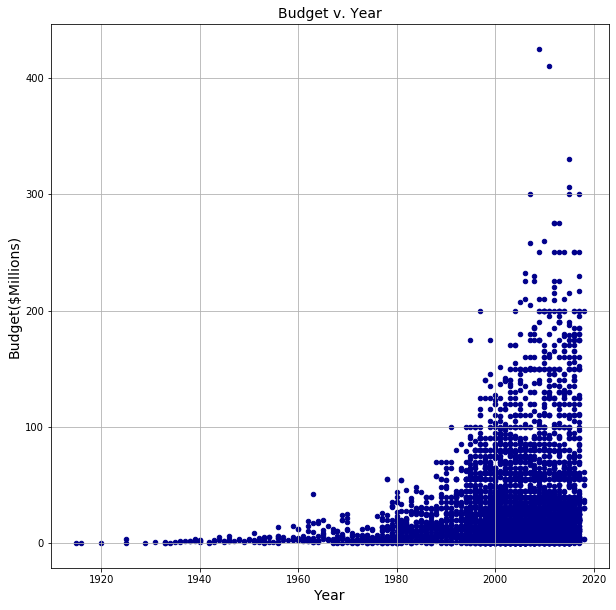

In [6]:
#Let's Look at the Spread of Budget for all the movies
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Budget v. Year", fontsize = 14)
df.plot.scatter(x = 'Year', y = 'Budget($Millions)',color = 'darkblue', ax=ax)
ax.grid(True)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Budget($Millions)', fontsize=14)


Looking at this graph I notice that like domestic graph, the budget seems to have a wider spread as the years become closer to present.  So as we get closer to present the variation in budget of films increases.  Also note the maximum budget was for 2009's 'Avatar'

In [7]:
#Let's Look at the top 10 most expensive budgets
df.nlargest(10, ['Budget($Millions)'])

,Movie,Month,Day,Year,Budget($Millions),Domestic Gross($Millions)
0,Avatar,Dec,18,2009,425.0,760.507625
23,Pirates of the Caribbean: On Stranger Tides,May,20,2011,410.6,241.063875
6,Avengers: Age of Ultron,May,1,2015,330.6,459.005868
2,Star Wars Ep. VII: The Force Awakens,Dec,18,2015,306.0,936.662225
36,Pirates of the Caribbean: At World’s End,May,24,2007,300.0,309.420425
52,Spectre,Nov,6,2015,300.0,200.074175
113,Justice League,Nov,17,2017,300.0,228.977297
19,The Dark Knight Rises,Jul,20,2012,275.0,448.139099
455,John Carter,Mar,9,2012,275.0,73.058679
506,The Lone Ranger,Jul,2,2013,275.0,89.302115


<BarContainer object of 91 artists>

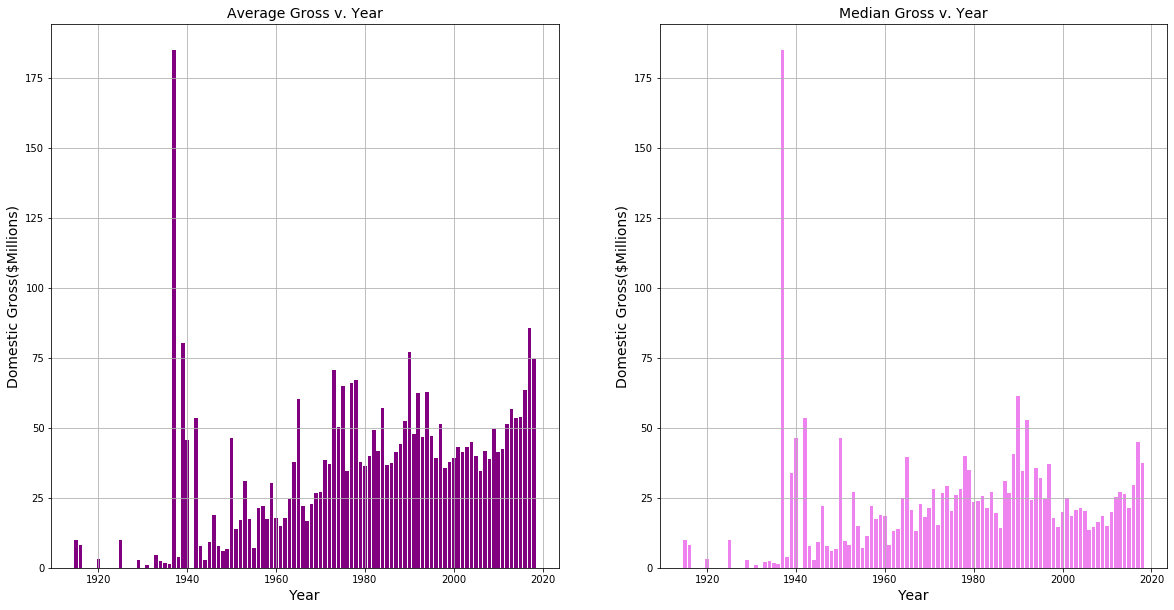

In [8]:
#Let's Look at the Average Domestic Gross for each year
df.sort_values(by=['Year'], inplace = True) #Create a list of the years in ascending order
years = df['Year'].unique()
years
domesticgrossavg = []     #Create a list of the average domestic gross for each year
for x in years:
    t = df[df["Year"] == x]
    y = t['Domestic Gross($Millions)'].mean()
    domesticgrossavg.append(y)

#Since there are so many outliers, let's also look at median    
domesticgrossmed = []     #Create a list of the median domestic gross for each year
for x in years:
    t = df[df["Year"] == x]
    y = t['Domestic Gross($Millions)'].median()
    domesticgrossmed.append(y) 
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10)) 
ax1.set_title("Average Gross v. Year", fontsize = 14)
ax1.bar(years, domesticgrossavg,color = 'purple')
ax1.grid(True)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Domestic Gross($Millions)', fontsize=14)


ax2.set_title("Median Gross v. Year", fontsize = 14)
ax2.grid(True)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Domestic Gross($Millions)', fontsize=14)
ax2.bar(years, domesticgrossmed, color = 'violet')
#This graph is interesing.  What I am noticing is that some years have some outliers that are really affecting 
#the placement of the points  For example in 1937 Snow White made 184 million dollars (verified by data and google)

In the averages graph I became more aware of a major outlier.  1937's Snow White and the Seven Dwarfs made $184 million (It was Walt Disney's first full length film). It is also the only film documented in the data frame for 1937.  So while 2015's Star Wars made 936 million, the other films of that year brought the average domestic gross down.  In fact in the later years the average domestic gross takes into account more films thus not being as affected by the outliers of the years.  This is why I created the median graph to eliminate most outliers. However, the median graph will not mask the outliers when they only contain one data value, like in 1937.  When looking at the median years the increase in domestic gross is not as dramatic.

Text(0, 0.5, 'Budget($Millions)')

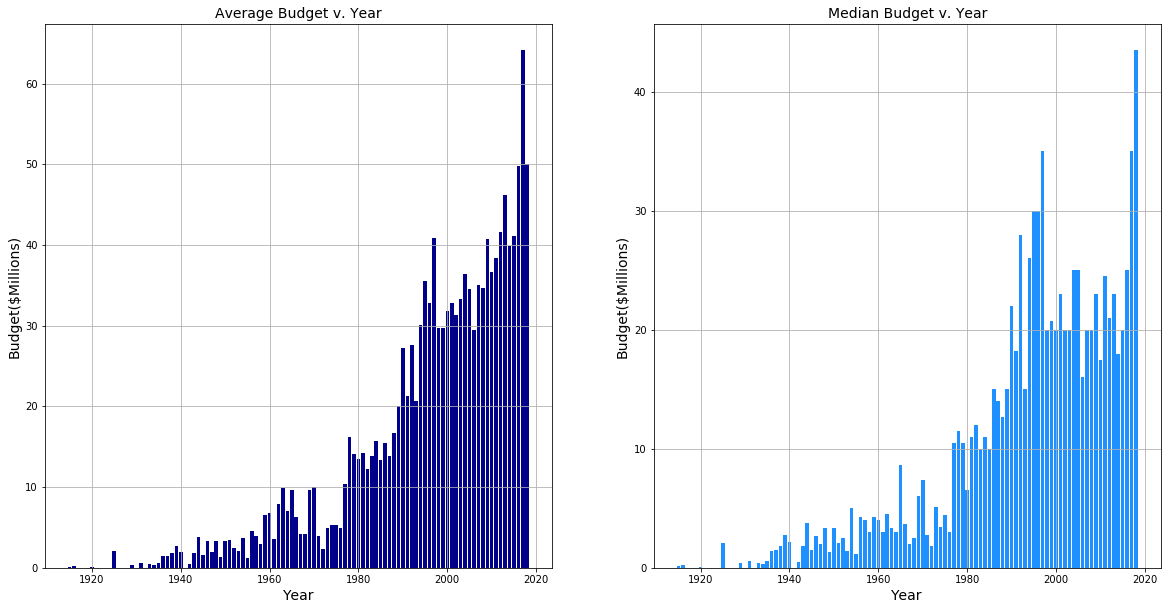

In [9]:
#Let's Look at the Average Budget for each year
budgetavg = []     #Create a list of the average budget for each year
for x in years:
    t = df[df["Year"] == x]
    y = t['Budget($Millions)'].mean()
    budgetavg.append(y)
#Again let's also look at median
budgetmed = []     #Create a list of the average budget for each year
for x in years:
    t = df[df["Year"] == x]
    y = t['Budget($Millions)'].median()
    budgetmed.append(y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.set_title("Average Budget v. Year", fontsize = 14)
ax1.bar(years, budgetavg,color = 'darkblue')
ax1.grid(True)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Budget($Millions)', fontsize=14)


ax2.set_title("Median Budget v. Year", fontsize = 14)
ax2.bar(years, budgetmed,color = 'dodgerblue')
ax2.grid(True)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Budget($Millions)', fontsize=14)
#2017 outlier in average budget, had a lot of high budget movies here including a Star Wars, Thor, Wonder Woman, and Gaurdian of the Galaxy Vol2

The average budget appears to have an exponential growth curve.  As the years increase the average budget increases.  What we do not know is whether inflation is taken into account in these numbers.  When looking at the median budger it is very similar to the average budget which means there were not as many outliers in the budgets.

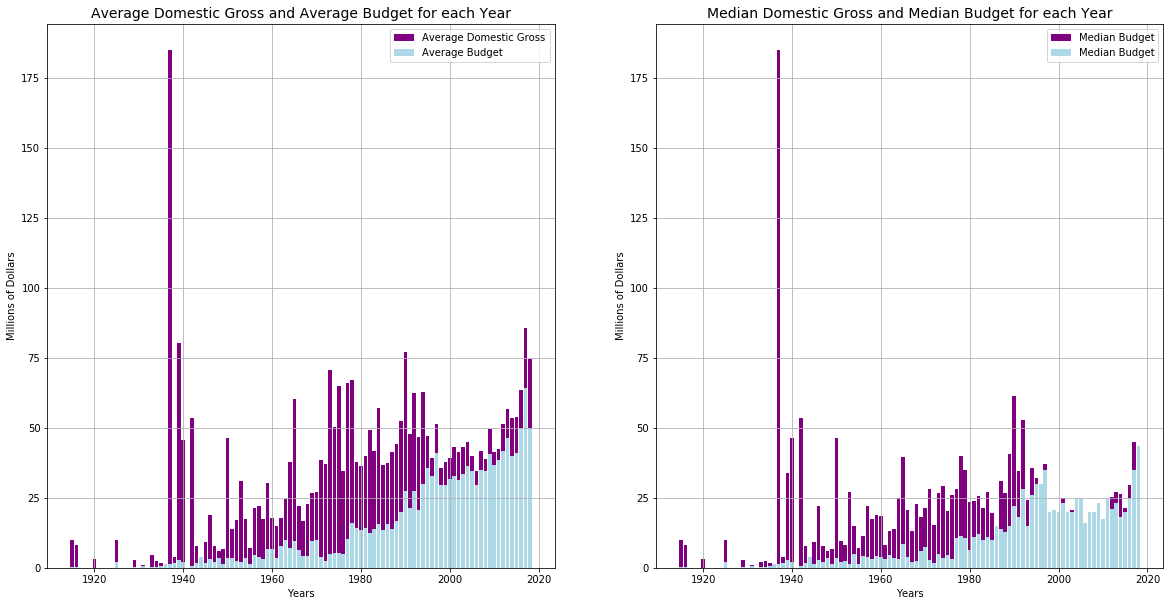

In [10]:
# Let's look at both average graphs on one plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.set_title("Average Domestic Gross and Average Budget for each Year", fontsize = 14)
ax1.bar(years, domesticgrossavg,color = 'purple', label = "Average Domestic Gross")
ax1.bar(years, budgetavg,color = 'lightblue', label = 'Average Budget')
ax1.set_ylabel("Millions of Dollars")
ax1.set_xlabel("Years")
ax1.grid(True)
ax1.legend(loc = 1)

ax2.set_title("Median Domestic Gross and Median Budget for each Year", fontsize = 14)
ax2.bar(years, domesticgrossmed, color = 'purple', label = 'Median Budget')
ax2.bar(years, budgetmed,color = 'lightblue', label = 'Median Budget')
ax2.set_ylabel("Millions of Dollars")
ax2.set_xlabel("Years")
ax2.grid(True)
ax2.legend(loc = 1)

These graphs compares average domestic gross and average budget of each year in the dataframe, as well as the median gross and median budget.  Looking at this graph, one can see that a little before the year 2000, the budget is getting much closer to the domestic gross.  So movies are becoming more expensive to make, but the domestic gross is not really increasing by all that much.  Looking at the second graph, the median budget sometimes surpasses the median gross.

Text(0, 0.5, 'Profit($Millions)')

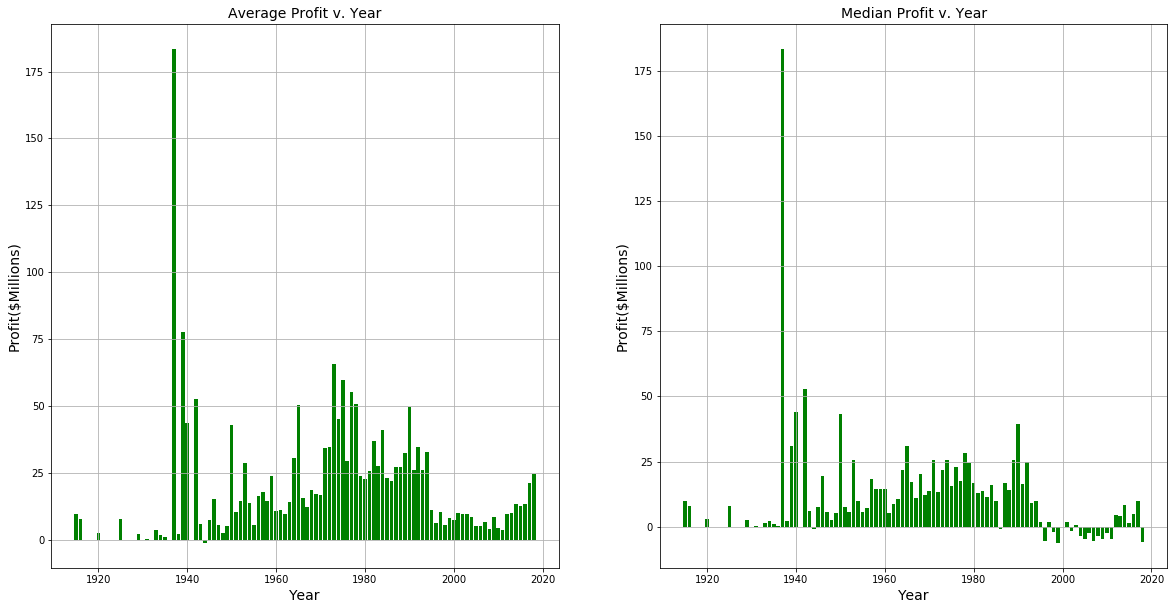

In [11]:
#Let's Look At Profit as defined by domestic gross - budget
profitavg = []
for i in range(len(years)):
    profitavg.append(domesticgrossavg[i] - budgetavg[i])
    
profitmed = []
for i in range(len(years)):
    profitmed.append(domesticgrossmed[i] - budgetmed[i])

# Above made a list of profit
#Below graphs year versus profit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.set_title("Average Profit v. Year", fontsize = 14)
ax1.bar(years, profitavg, color = 'green')
ax1.grid(True)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Profit($Millions)', fontsize=14)

ax2.set_title("Median Profit v. Year", fontsize = 14)
ax2.bar(years, profitmed,color = 'green')
ax2.grid(True)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Profit($Millions)', fontsize=14)

In these graphs I am using the word profit to represent the difference between budget and domestic gross.  As we can see the profit starting at the late 1990's is smaller than the year prior.  It is important again to take into account the spread of movies for each year and the outliers of each year that were observed in the first 2 graphs.  Looking at the Median Graph which eliminates most outliers we see that some years the budget is greater that the domestic gross making the profit negative.  I would also like to mention here that Netflix started in 1997.  While it did not begin as a streaming service, it did eventually become one and lead to a new way of accessing movies and television.  An avenue that I would take to further this investigation would be to look at the streaming services and their data.

#### Conclusion
1. The film is the largest domestic gross is 'Star Wars Ep. VII: The Force Awakens', 'Avatar' had the highest budget
2. 'Snow White and the Seven Dwarfs' did an amazing job for its time period with a domestic gross of $184 million.
3. 'Avatar' had the highest budget.
4. As the year became closer to present, the amount of movies in the dataset each year increased and the spread of their domestic gross and budget became wider.
5. A little before the year 2000, the profit of movies became on average smaller.  In fact, when looking at the median for each year, the median budget was sometimes greater than the median profit.

##### What I learned from this project
1. My least favorite part of data analyzing is finding the data.
2. I need to dig a little deeper to make sure my data is actually scrapable.
3. It is important to think about what type of measurements your using ie mean vs. median.
4. I struggle with writing conclusions.
5. Datasets are not perfect and you can only work with what you are given, even if it does not include all the data of a time period.